# Detection of Fraud Reviews: Exploratory Data Analysis

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Reading datasets

### Fake Reviews dataset

In [2]:
# Path to your CSV file
fake_reviews_path = r'C:\Users\LeeShan\Fake-Reviews-Detection\Dataset\fake reviews dataset.csv'

# Read the CSV file
fake_reviews_df = pd.read_csv(fake_reviews_path)

In [3]:
fake_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [4]:
fake_reviews_df.shape

(40432, 4)

In [5]:
fake_reviews_df.columns

Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [ ]:
# Display the first few rows
fake_reviews_df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


### Yelp dataset

In [7]:
# Path to your Excel file
yelp_path = r'C:\Users\LeeShan\Fake-Reviews-Detection\Dataset\Yelp Labelled Review Dataset with Sentiments and Features.xlsx'

# Read the Excel file
yelp_df = pd.read_excel(yelp_path, engine='openpyxl')

In [8]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355210 entries, 0 to 355209
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   User_id                  355210 non-null  int64         
 1   Product_id               355210 non-null  int64         
 2   Rating                   355210 non-null  int64         
 3   Date                     355210 non-null  datetime64[ns]
 4   Review                   355210 non-null  object        
 5   Spam(1) and Not Spam(0)  355210 non-null  int64         
 6   Sentiment                355210 non-null  object        
 7   Features                 355210 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 21.7+ MB


In [9]:
yelp_df.shape

(355210, 8)

In [10]:
yelp_df.columns

Index(['User_id', 'Product_id', 'Rating', 'Date', 'Review',
       'Spam(1) and Not Spam(0)', 'Sentiment', 'Features'],
      dtype='object')

In [11]:
# Display the first few rows
yelp_df.head()

,User_id,Product_id,Rating,Date,Review,Spam(1) and Not Spam(0),Sentiment,Features
0,923,0,3,2014-01-30,The food at snack is a selection of popular Gr...,1,Positive,"['appetizer tray', 'greek salad', 'main courses']"
1,924,0,3,2011-05-05,This little place in Soho is wonderful. I had ...,1,Positive,"['little place', 'soho', 'lamb sandwich', 'soh..."
2,925,0,4,2011-12-30,ordered lunch for 15 from Snack last Friday. Ã...,1,Positive,"['snack', 'regular company lunch list']"
3,926,0,4,2012-10-04,This is a beautiful quaint little restaurant o...,1,Positive,"['beautiful quaint', 'pretty street', 'great p..."
4,927,0,4,2014-02-06,Snack is great place for a Ã‚Â casual sit down...,1,Positive,"['snack', 'great place', 'Ã¢ casual', 'cold wi..."


## Check for missing values

### Fake Reviews dataset

In [ ]:
# Check for missing values
fake_reviews_df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

### Yelp dataset

In [13]:
# Check for missing values
yelp_df.isnull().sum()

User_id                    0
Product_id                 0
Rating                     0
Date                       0
Review                     0
Spam(1) and Not Spam(0)    0
Sentiment                  0
Features                   0
dtype: int64

## Check for duplicated values

### Fake Reviews dataset

In [14]:
fake_reviews_df_duplicates = fake_reviews_df.duplicated().sum()

print("Number of duplicates in dataset:", fake_reviews_df_duplicates)

Number of duplicates in dataset: 12


In [15]:
# If you want to see the actual duplicate rows
fake_reviews_duplicate_rows = fake_reviews_df[fake_reviews_df.duplicated(keep=False)]

print("Duplicate rows in the dataset:\n", fake_reviews_duplicate_rows)

Duplicate rows in the dataset:
                            category  rating label  \
6018          Sports_and_Outdoors_5     5.0    CG   
6025          Sports_and_Outdoors_5     5.0    CG   
6706          Sports_and_Outdoors_5     5.0    CG   
6708          Sports_and_Outdoors_5     5.0    CG   
12289               Movies_and_TV_5     5.0    CG   
12548               Movies_and_TV_5     5.0    CG   
19638                Pet_Supplies_5     5.0    CG   
19802                Pet_Supplies_5     5.0    CG   
19803                Pet_Supplies_5     5.0    CG   
20242                Pet_Supplies_5     5.0    CG   
22294                Pet_Supplies_5     5.0    OR   
22305                Pet_Supplies_5     5.0    OR   
26399                Kindle_Store_5     5.0    CG   
26444                Kindle_Store_5     5.0    CG   
27232                Kindle_Store_5     5.0    CG   
27233                Kindle_Store_5     5.0    CG   
29091                       Books_5     5.0    CG   
29203         

Drop the duplicate rows

In [16]:
# Drop duplicates while keeping the first occurrence
fake_reviews_df = fake_reviews_df.drop_duplicates()

# Check the new count of duplicates to confirm removal
print("Number of duplicates after dropping: ", fake_reviews_df.duplicated().sum())

Number of duplicates after dropping:  0


### Yelp dataset

In [17]:
yelp_df_duplicates = yelp_df.duplicated().sum()

print("Number of duplicates in dataset: ", yelp_df_duplicates)

Number of duplicates in dataset:  0


## Describing dataset

### Fake Reviews dataset

In [18]:
fake_reviews_df.describe()

,rating
count,40420.000000
mean,4.256358
std,1.144452
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Yelp dataset

In [19]:
yelp_df.describe()

,User_id,Product_id,Rating,Date,Spam(1) and Not Spam(0)
count,355210.000000,355210.000000,355210.000000,355210,355210.000000
mean,54016.107489,460.646674,3.604355,2012-11-30 06:17:35.037865216,0.101723
min,923.000000,0.000000,1.000000,2011-03-01 00:00:00,0.000000
25%,13834.000000,247.000000,3.000000,2012-01-16 00:00:00,0.000000
50%,40531.500000,468.000000,4.000000,2012-11-30 00:00:00,0.000000
75%,87641.000000,672.000000,5.000000,2013-10-16 00:00:00,0.000000
max,161147.000000,922.000000,5.000000,2014-08-31 00:00:00,1.000000
std,45871.499377,260.531902,1.365950,NaN,0.302284


## Distribution of ratings

### Fake Reviews dataset

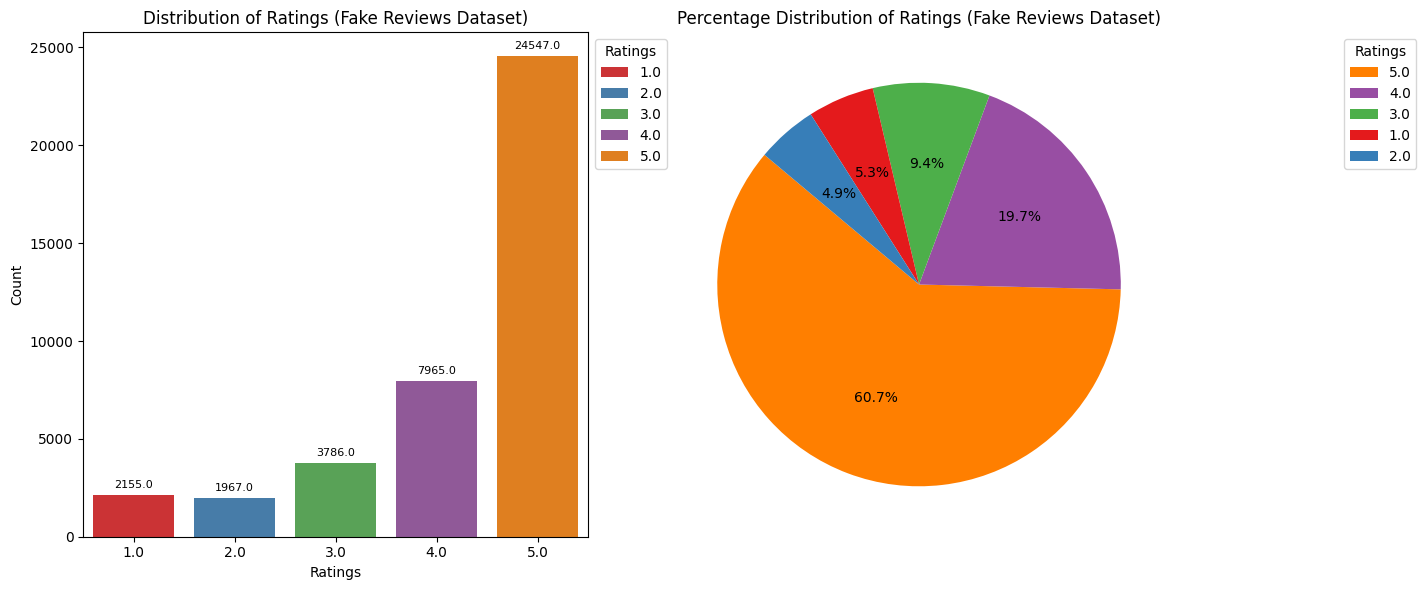

In [20]:
# Set up the plot for Fake Reviews countplot
plt.figure(figsize=(14, 6))

# Choose a color palette from Set1 with a fixed number of colors
set1_colors = sns.color_palette("Set1", n_colors=5)

# Define a mapping of ratings to colors from the Set1 palette
rating_colors_fake_reviews = {
    1.0: set1_colors[0],  # First color (Red)
    2.0: set1_colors[1],  # Second color (Blue)
    3.0: set1_colors[2],  # Third color (Green)
    4.0: set1_colors[3],  # Fourth color (Orange)
    5.0: set1_colors[4]   # Fifth color (Yellow)
}

# Plot the countplot with hue set to 'rating'
ax_fake_reviews = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='rating', data=fake_reviews_df, hue='rating', palette=rating_colors_fake_reviews)

# Add title
plt.title("Distribution of Ratings (Fake Reviews Dataset)")
plt.xlabel("Ratings")  # Customize the x-axis label
plt.ylabel("Count")    # Customize the y-axis label

# Add number on top of each bar
for p in ax_fake_reviews.patches:
    height = p.get_height()
    # Only annotate if the height is greater than 0
    if height > 0:
        ax_fake_reviews.annotate(f'{height}', 
                                (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='baseline',
                                fontsize=8, color='black', xytext=(0, 5), 
                                textcoords='offset points')

# Show legend outside the plot
plt.legend(title='Ratings', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position here

# Create a pie chart for the percentage distribution of ratings
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
rating_counts_fake_reviews = fake_reviews_df['rating'].value_counts()
wedges_fake_reviews, texts_fake_reviews, autotexts_fake_reviews = plt.pie(
    rating_counts_fake_reviews, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[rating_colors_fake_reviews[rating] for rating in rating_counts_fake_reviews.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Ratings (Fake Reviews Dataset)")

# Create a legend with the corresponding colors
plt.legend(wedges_fake_reviews, rating_counts_fake_reviews.index, title="Ratings", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


### Yelp dataset

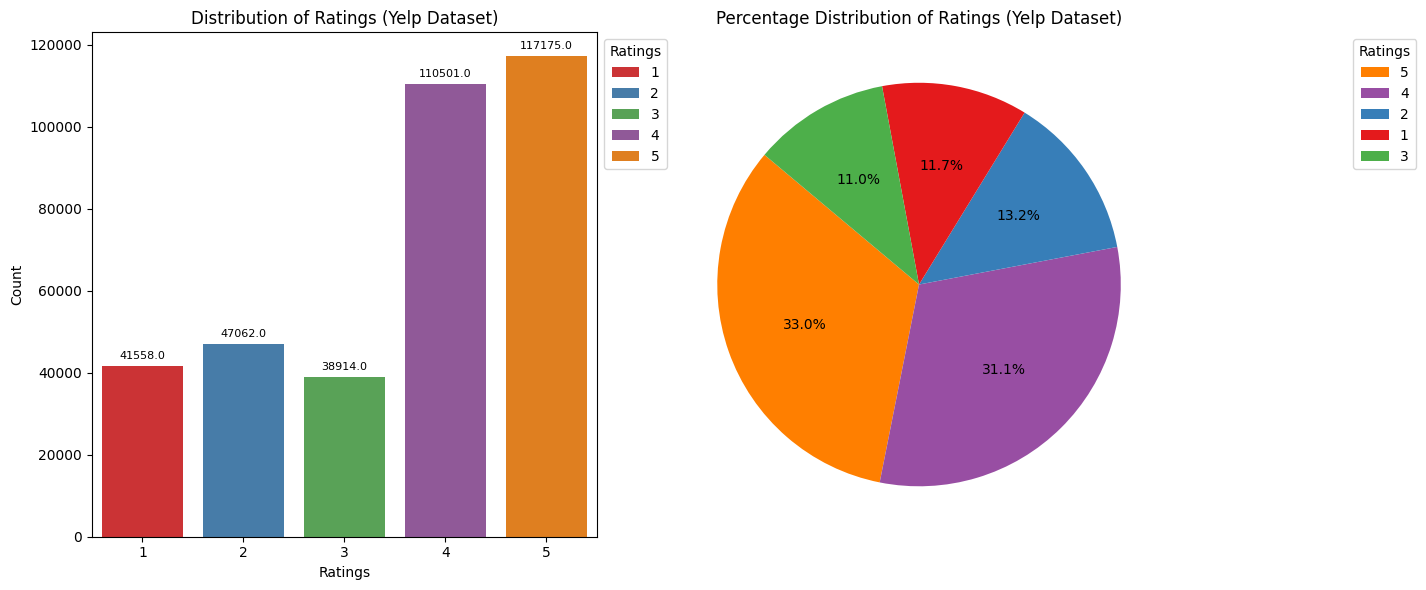

In [21]:
# Set up the plot for Yelp Dataset countplot
plt.figure(figsize=(14, 6))

# Choose a color palette from Set1 with a fixed number of colors
set1_colors = sns.color_palette("Set1", n_colors=5)

# Define a mapping of ratings to colors from the Set1 palette
rating_colors_yelp = {
    1.0: set1_colors[0],  # First color (Red)
    2.0: set1_colors[1],  # Second color (Blue)
    3.0: set1_colors[2],  # Third color (Green)
    4.0: set1_colors[3],  # Fourth color (Orange)
    5.0: set1_colors[4]   # Fifth color (Yellow)
}

# Plot the countplot with hue set to 'Rating'
ax_yelp = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='Rating', data=yelp_df, hue='Rating', palette=rating_colors_yelp)

# Add title
plt.title("Distribution of Ratings (Yelp Dataset)")
plt.xlabel("Ratings")  # Customize the x-axis label
plt.ylabel("Count")    # Customize the y-axis label

# Add number on top of each bar
for p in ax_yelp.patches:
    height = p.get_height()
    # Only annotate if the height is greater than 0
    if height > 0:
        ax_yelp.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline',
                         fontsize=8, color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Show legend outside the plot
plt.legend(title='Ratings', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust position here

# Create a pie chart for the percentage distribution of ratings
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
rating_counts_yelp = yelp_df['Rating'].value_counts()
wedges_yelp, texts_yelp, autotexts_yelp = plt.pie(
    rating_counts_yelp, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[rating_colors_yelp[rating] for rating in rating_counts_yelp.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Ratings (Yelp Dataset)")

# Create a legend with the corresponding colors
plt.legend(wedges_yelp, rating_counts_yelp.index, title="Ratings", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


## Distribution of target variable

### Fake Reviews dataset

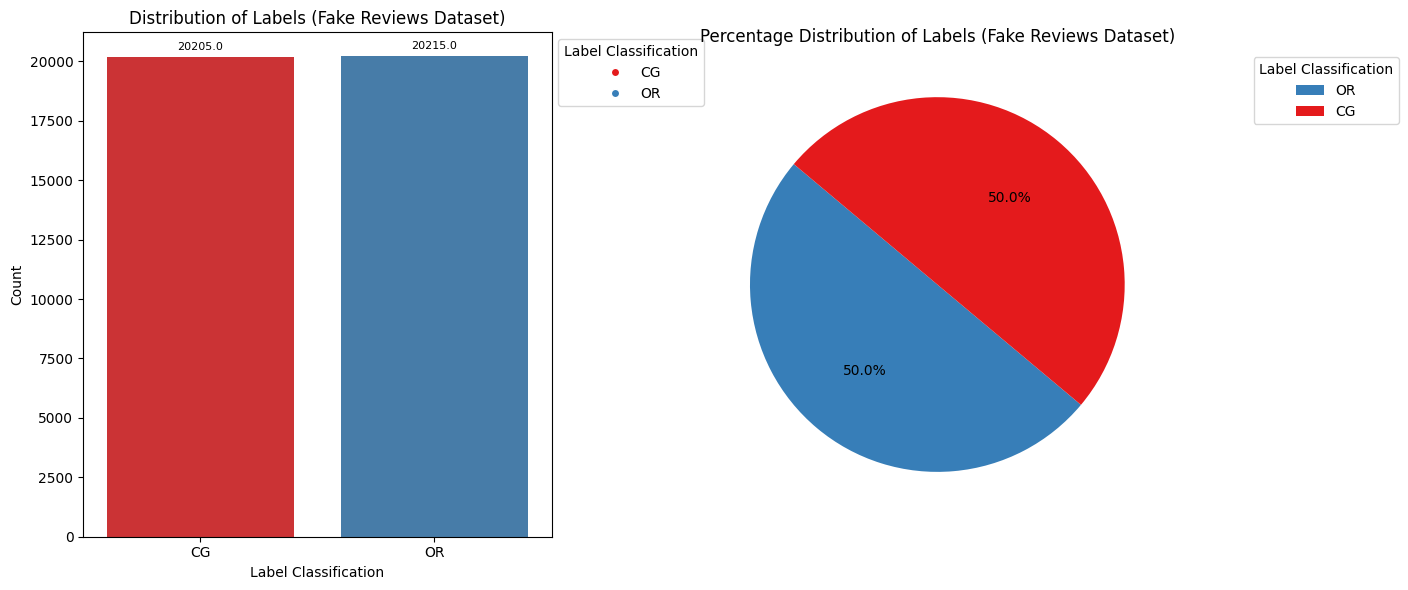

In [22]:
# Choose a color palette for fake reviews dataset
unique_labels_fake_reviews = fake_reviews_df['label'].unique()
colors_fake_review_label = sns.color_palette("Set1", n_colors=len(unique_labels_fake_reviews))

# Create a dictionary to map each label to its corresponding color
label_color_map_fake_reviews = dict(zip(unique_labels_fake_reviews, colors_fake_review_label))

# Set up the plot for Fake Reviews label countplot and pie chart
plt.figure(figsize=(14, 6))

# Plot the countplot with hue for fake reviews
ax_fake_reviews = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='label', data=fake_reviews_df, hue='label', palette=label_color_map_fake_reviews)

# Add title
plt.title("Distribution of Labels (Fake Reviews Dataset)")

# Add axis labels
plt.xlabel("Label Classification")  # Customize the x-axis label
plt.ylabel("Count")                 # Customize the y-axis label

# Add number on top of each bar
for p in ax_fake_reviews.patches:
    height = p.get_height()
    # Only annotate if the height is greater than 0
    if height > 0:
        ax_fake_reviews.annotate(f'{height}', 
                                (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='baseline',
                                fontsize=8, color='black', xytext=(0, 5), 
                                textcoords='offset points')

# Manually create legend for the countplot
handles_fake_reviews = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                       markerfacecolor=label_color_map_fake_reviews[label]) for label in unique_labels_fake_reviews]
plt.legend(handles=handles_fake_reviews, title='Label Classification', loc='upper left', bbox_to_anchor=(1, 1))

# Create a pie chart for the percentage distribution of labels
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
label_counts = fake_reviews_df['label'].value_counts()
wedges_fake_review, texts_fake_review, autotexts_fake_review = plt.pie(
    label_counts, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[label_color_map_fake_reviews[label] for label in label_counts.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Labels (Fake Reviews Dataset)")

# Create a legend with the corresponding colors for the pie chart
plt.legend(wedges_fake_review, label_counts.index, title="Label Classification", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


### Yelp dataset

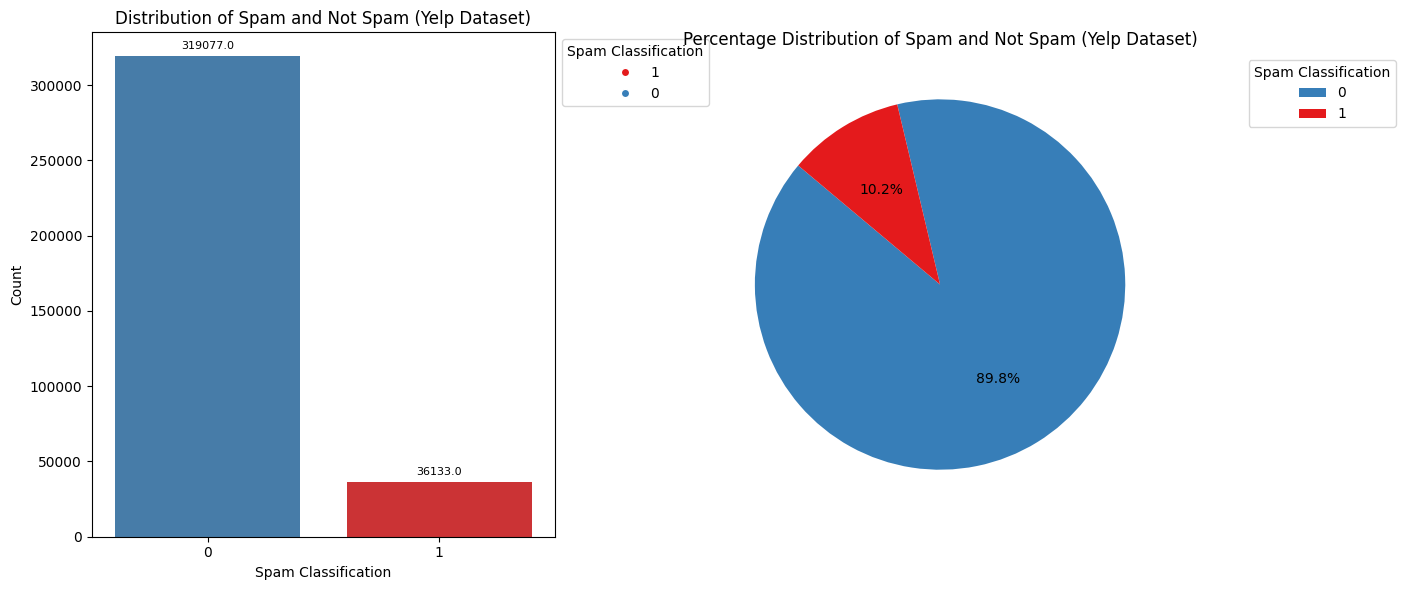

In [23]:
# Choose a color palette for Yelp dataset
unique_labels_yelp = yelp_df['Spam(1) and Not Spam(0)'].unique()
colors_yelp_label = sns.color_palette("Set1", n_colors=len(unique_labels_yelp))

# Create a dictionary to map each label to its corresponding color
label_color_map_yelp = dict(zip(unique_labels_yelp, colors_yelp_label))

# Set up the plot for Yelp dataset countplot and pie chart
plt.figure(figsize=(14, 6))

# Plot the countplot with hue for Yelp dataset
ax_yelp = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='Spam(1) and Not Spam(0)', data=yelp_df, hue='Spam(1) and Not Spam(0)', palette=label_color_map_yelp)

# Add title
plt.title("Distribution of Spam and Not Spam (Yelp Dataset)")

# Add axis labels
plt.xlabel("Spam Classification")  # Customize the x-axis label
plt.ylabel("Count")                 # Customize the y-axis label

# Add number on top of each bar
for p in ax_yelp.patches:
    height = p.get_height()
    # Only annotate if the height is greater than 0
    if height > 0:
        ax_yelp.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline',
                         fontsize=8, color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Manually create legend for the countplot
handles_yelp = [plt.Line2D([0], [0], marker='o', color='w', label=str(label), 
                             markerfacecolor=label_color_map_yelp[label]) for label in unique_labels_yelp]
plt.legend(handles=handles_yelp, title='Spam Classification', loc='upper left', bbox_to_anchor=(1, 1))

# Create a pie chart for the percentage distribution of spam labels
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
spam_counts = yelp_df['Spam(1) and Not Spam(0)'].value_counts()
wedges_yelp, texts_yelp, autotexts_yelp = plt.pie(
    spam_counts, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=[label_color_map_yelp[label] for label in spam_counts.index]
)

# Add title for the pie chart
plt.title("Percentage Distribution of Spam and Not Spam (Yelp Dataset)")

# Create a legend with the corresponding colors for the pie chart
plt.legend(wedges_yelp, spam_counts.index, title="Spam Classification", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout and show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


## Graphs between ratings and target variable

### Distribution of ratings by target variable

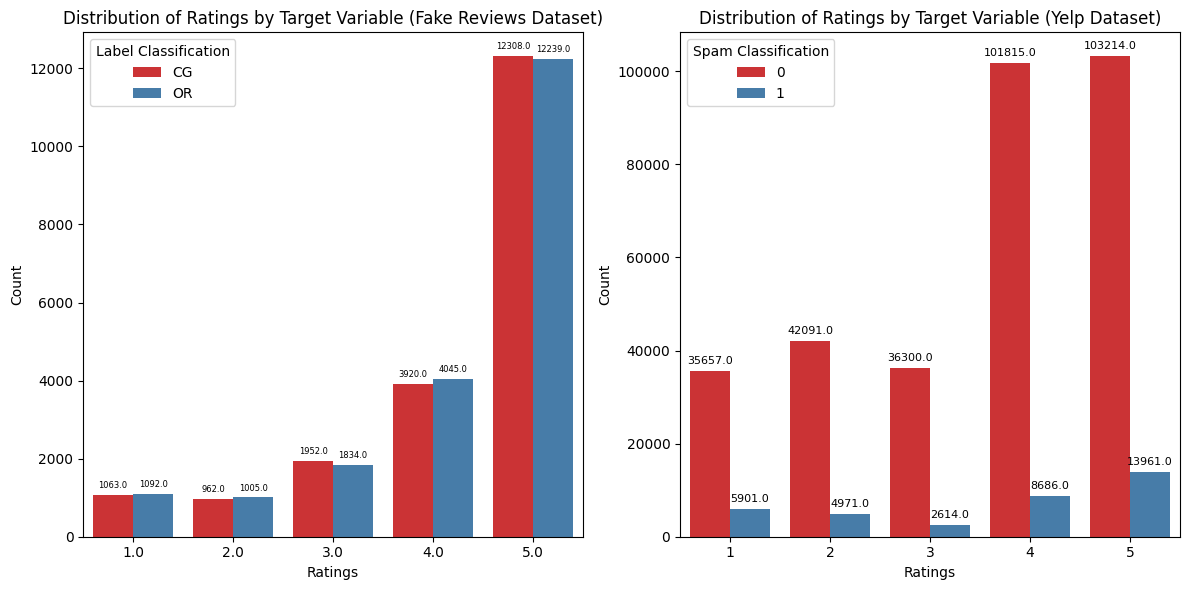

In [24]:
# Set up the plot for both datasets
plt.figure(figsize=(12, 6))

# Create a countplot for Fake Reviews
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='rating', hue='label', data=fake_reviews_df, palette='Set1')
plt.title("Distribution of Ratings by Target Variable (Fake Reviews Dataset)")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.legend(title='Label Classification')

# Add annotations for Fake Reviews, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=6, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Create a countplot for Yelp Dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.countplot(x='Rating', hue='Spam(1) and Not Spam(0)', data=yelp_df, palette='Set1')
plt.title("Distribution of Ratings by Target Variable (Yelp Dataset)")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.legend(title='Spam Classification')

# Add annotations for Yelp Dataset, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=8, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Distribution of target variable by ratings

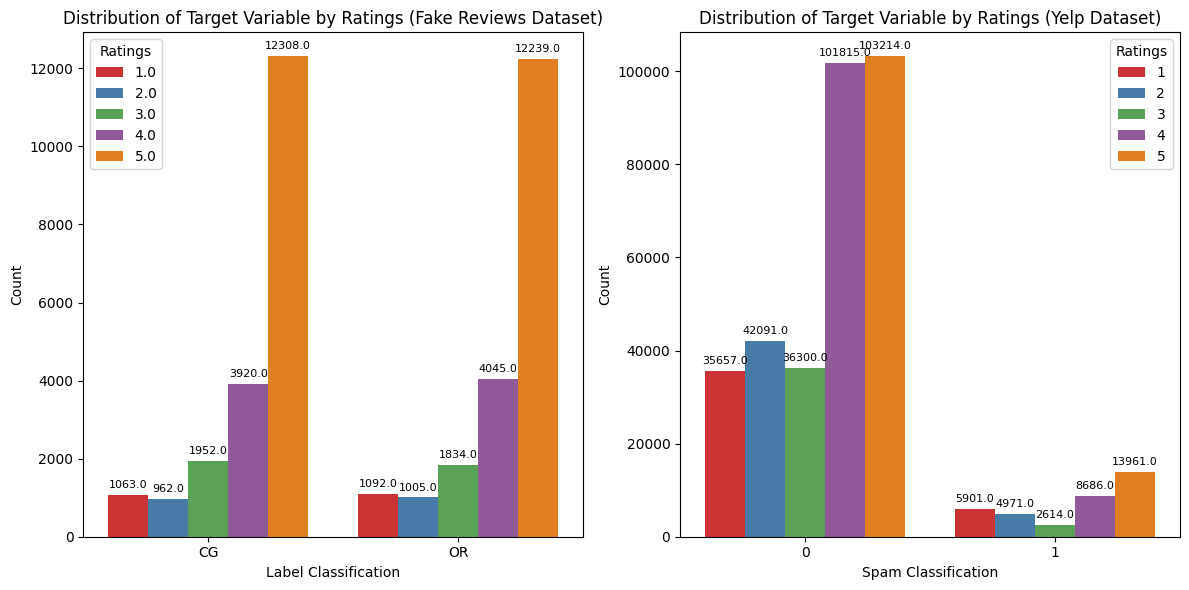

In [25]:
# Set up the plot for both datasets
plt.figure(figsize=(12, 6))

# Create a countplot for Fake Reviews by Target Variable
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.countplot(x='label', hue='rating', data=fake_reviews_df, palette='Set1')
plt.title("Distribution of Target Variable by Ratings (Fake Reviews Dataset)")
plt.xlabel("Label Classification")
plt.ylabel("Count")
plt.legend(title='Ratings')

# Add annotations for Fake Reviews, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=8, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Create a countplot for Yelp Dataset by Target Variable
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.countplot(x='Spam(1) and Not Spam(0)', hue='Rating', data=yelp_df, palette='Set1')
plt.title("Distribution of Target Variable by Ratings (Yelp Dataset)")
plt.xlabel("Spam Classification")
plt.ylabel("Count")
plt.legend(title='Ratings')

# Add annotations for Yelp Dataset, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=8, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Other distributions for Fake Reviews dataset

### Graphs between category and target variable

Distribution of category

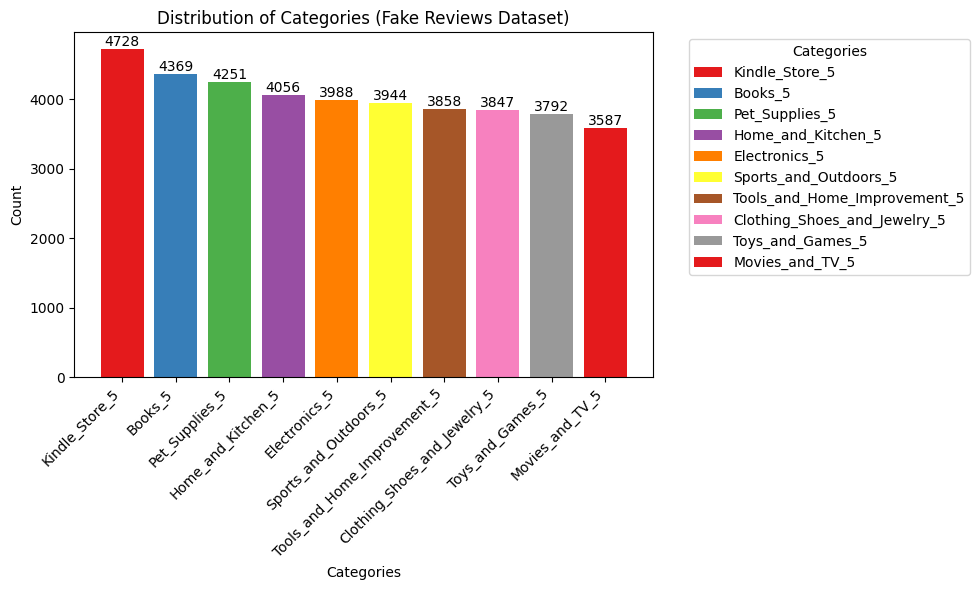

In [26]:
# Choose a color palette for fake reviews
colors_fake_review_category = sns.color_palette("Set1", n_colors=fake_reviews_df['category'].nunique())

# Count occurrences of each category
category_counts = fake_reviews_df['category'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values, color=colors_fake_review_category)

# Add title and labels
plt.title("Distribution of Categories (Fake Reviews Dataset)")
plt.xlabel("Categories")
plt.ylabel("Count")

# Add number on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create a legend
# Use a list comprehension to create labels
legend_labels = category_counts.index
plt.legend(bars, legend_labels, title="Categories", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


Distribution of category by target variable

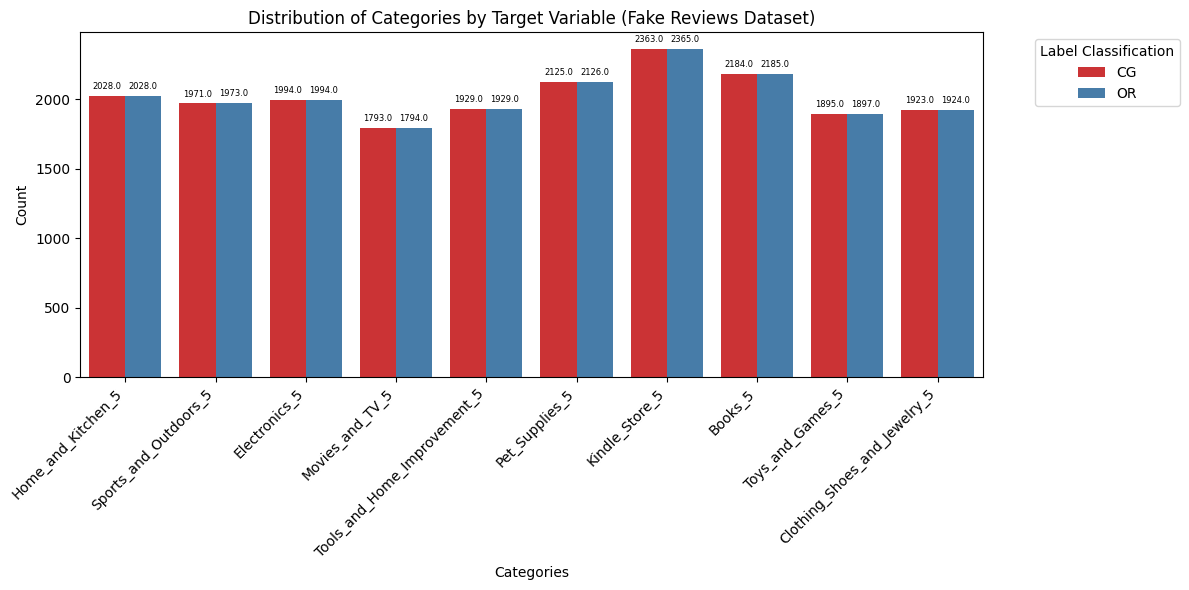

In [27]:
# Set up the plot for Distribution of Category by Target Variable
plt.figure(figsize=(12, 6))

# Create a countplot for Category by Target Variable
sns.countplot(x='category', hue='label', data=fake_reviews_df, palette='Set1')

# Add title and labels
plt.title("Distribution of Categories by Target Variable (Fake Reviews Dataset)")
plt.xlabel("Categories")
plt.ylabel("Count")

# Add annotations for the countplot, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=6, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Create a legend outside the plot
plt.legend(title='Label Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()

Distribution of target variable by category 

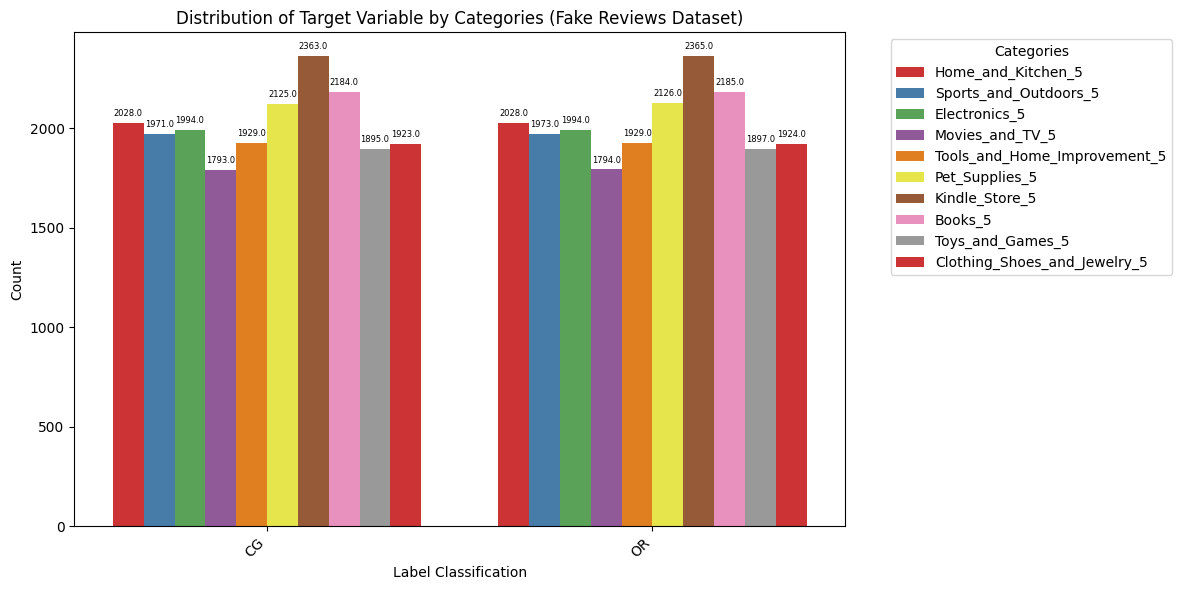

In [28]:
# Set up the plot for Distribution of Target Variable by Category
plt.figure(figsize=(12, 6))

# Create a countplot for Target Variable by Category
sns.countplot(x='label', hue='category', data=fake_reviews_df, palette='Set1')

# Add title and labels
plt.title("Distribution of Target Variable by Categories (Fake Reviews Dataset)")
plt.xlabel("Label Classification")
plt.ylabel("Count")

# Add annotations for the countplot, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=6, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Create a legend outside the plot
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()


## Other distributions for Yelp dataset

### Graphs between reviews and date

Distribution of reviews by year

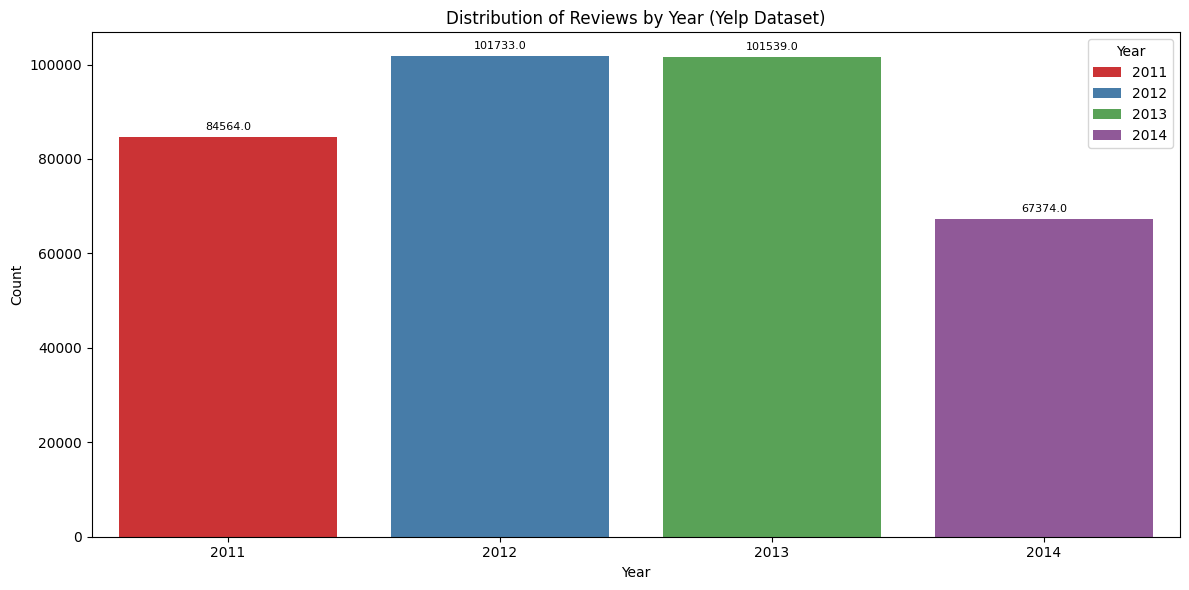

In [29]:
# Extract the year from the date
yelp_df['Year'] = yelp_df['Date'].dt.year

# Set up the plot
plt.figure(figsize=(12, 6))

# Create a countplot for reviews by year
sns.countplot(x='Year', data=yelp_df, palette='Set1', hue='Year')  # Set hue=None to avoid the warning

# Add title and labels
plt.title("Distribution of Reviews by Year (Yelp Dataset)")
plt.xlabel("Year")
plt.ylabel("Count")

# Add annotations for the countplot, only if height > 0
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        plt.annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='baseline', fontsize=8, 
                     color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Show plot
plt.tight_layout()  # Adjust layout
plt.show()


Distribution of reviews by year and month

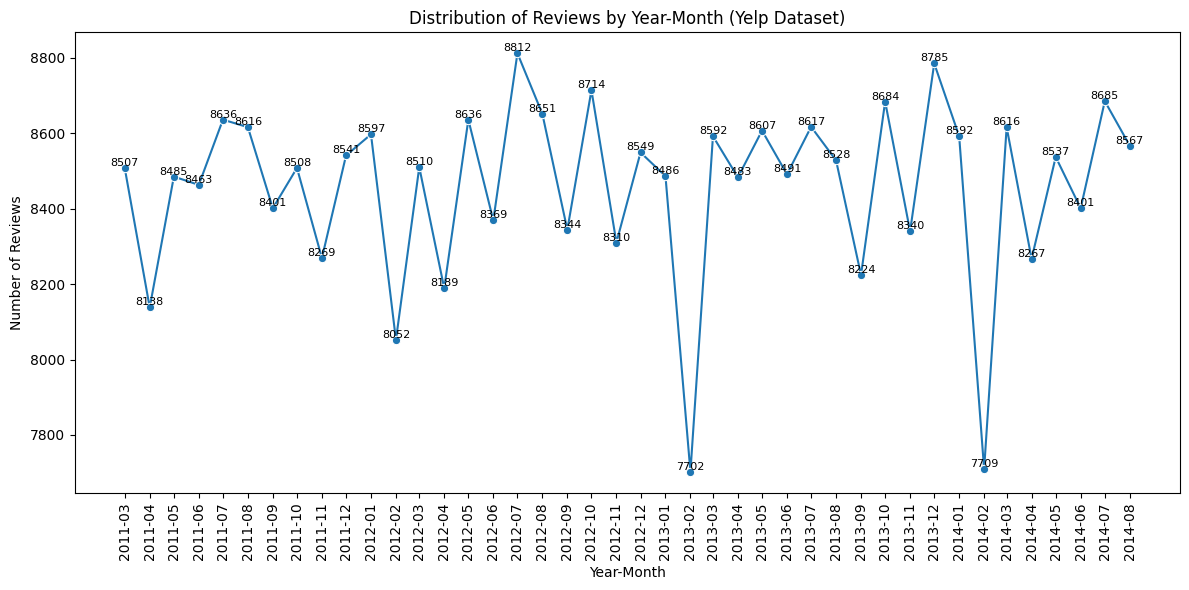

In [30]:
# Extract Year and Month from the 'Date' column
yelp_df['YearMonth'] = yelp_df['Date'].dt.to_period('M')

# Count the number of reviews per month-year
reviews_per_month = yelp_df['YearMonth'].value_counts().sort_index()

# Convert index back to a DatetimeIndex for plotting
reviews_per_month.index = reviews_per_month.index.to_timestamp()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=reviews_per_month.index, y=reviews_per_month.values, marker='o')

# Add title and labels
plt.title("Distribution of Reviews by Year-Month (Yelp Dataset)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")

# Annotate each point with the review count
for x, y in zip(reviews_per_month.index, reviews_per_month.values):
    plt.text(x, y, str(y), fontsize=8, ha='center', va='bottom')

# Format x-axis to display Year-Month
plt.xticks(reviews_per_month.index, reviews_per_month.index.strftime('%Y-%m'), rotation=90)

# Show plot
plt.tight_layout()
plt.show()


### Graphs between date and target variable

Distribution of year by target variable and Distribution of target variable by year

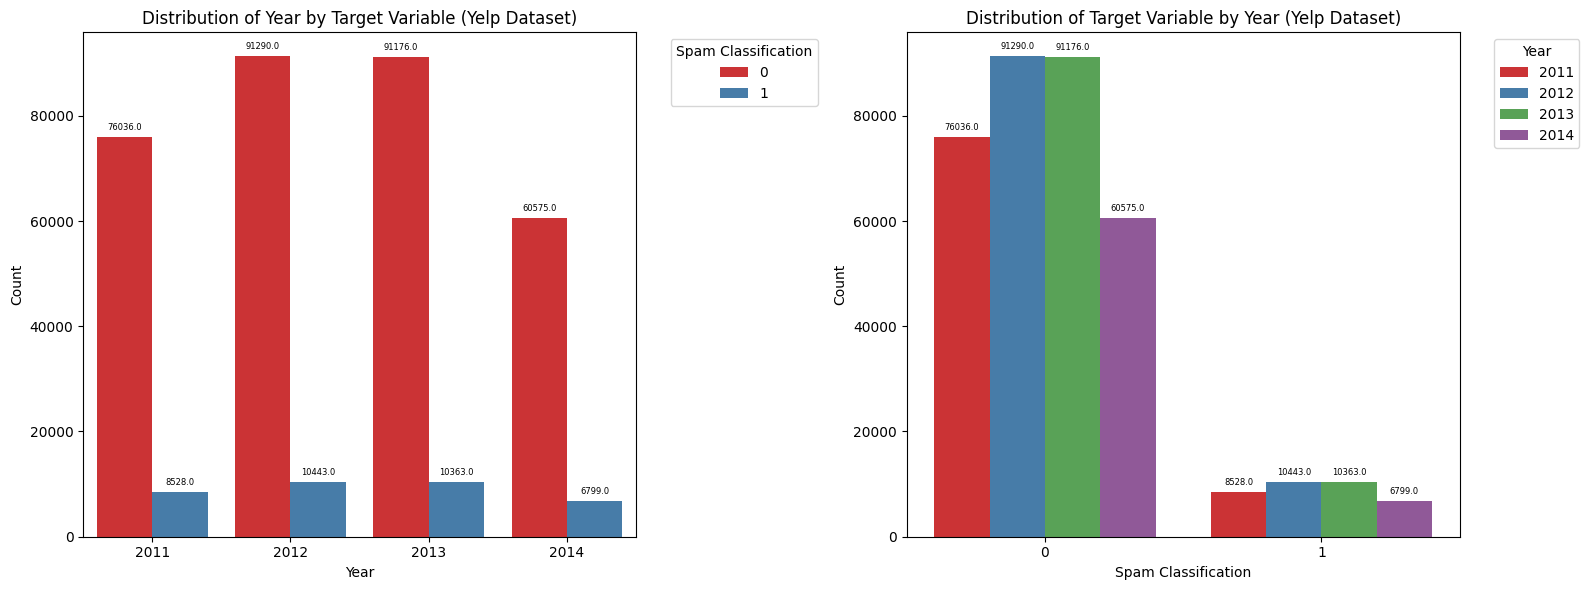

In [31]:
# Set up the figure and subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First Plot: Distribution of Year by Target Variable
sns.countplot(x='Year', hue='Spam(1) and Not Spam(0)', data=yelp_df, palette='Set1', ax=axes[0])

# Add title and labels for the first plot
axes[0].set_title("Distribution of Year by Target Variable (Yelp Dataset)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")

# Add annotations for the first plot, only if height > 0
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[0].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=6, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[0].tick_params(axis='x', rotation=0)

# Create a legend outside the first plot
axes[0].legend(title='Spam Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Second Plot: Distribution of Target Variable by Year
sns.countplot(x='Spam(1) and Not Spam(0)', hue='Year', data=yelp_df, palette='Set1', ax=axes[1])

# Add title and labels for the second plot
axes[1].set_title("Distribution of Target Variable by Year (Yelp Dataset)")
axes[1].set_xlabel("Spam Classification")
axes[1].set_ylabel("Count")

# Add annotations for the second plot, only if height > 0
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[1].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=6, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[1].tick_params(axis='x', rotation=0)

# Create a legend outside the second plot
axes[1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for both plots
plt.tight_layout()
plt.show()


### Graphs between target variable and sentiment

Distribution of sentiment

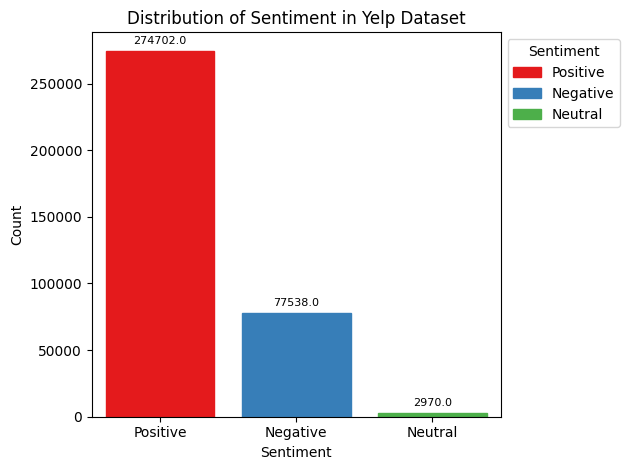

In [32]:
# Check the unique values in 'Sentiment'
unique_sentiments = yelp_df['Sentiment'].unique()

# Create the countplot without 'palette'
ax_yelp = sns.countplot(x='Sentiment', data=yelp_df)

# Manually color each bar using the 'Set1' palette (3 unique colors)
colors_yelp_sentiment = sns.color_palette("Set1", n_colors=3)
for i, bar in enumerate(ax_yelp.patches):
    bar.set_color(colors_yelp_sentiment[i % 3])  # Apply colors cyclically for each sentiment

# Add title and labels
plt.title("Distribution of Sentiment in Yelp Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Annotate each bar with the count
for p in ax_yelp.patches:
    height = p.get_height()
    if height > 0:
        ax_yelp.annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline',
                         fontsize=8, color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Manually create the legend
handles = [mpatches.Patch(color=colors_yelp_sentiment[i], label=unique_sentiments[i]) for i in range(3)]
plt.legend(handles=handles, title='Sentiment', loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()


Distribution of sentiment by target variable and Distribution of target variable by sentiment 

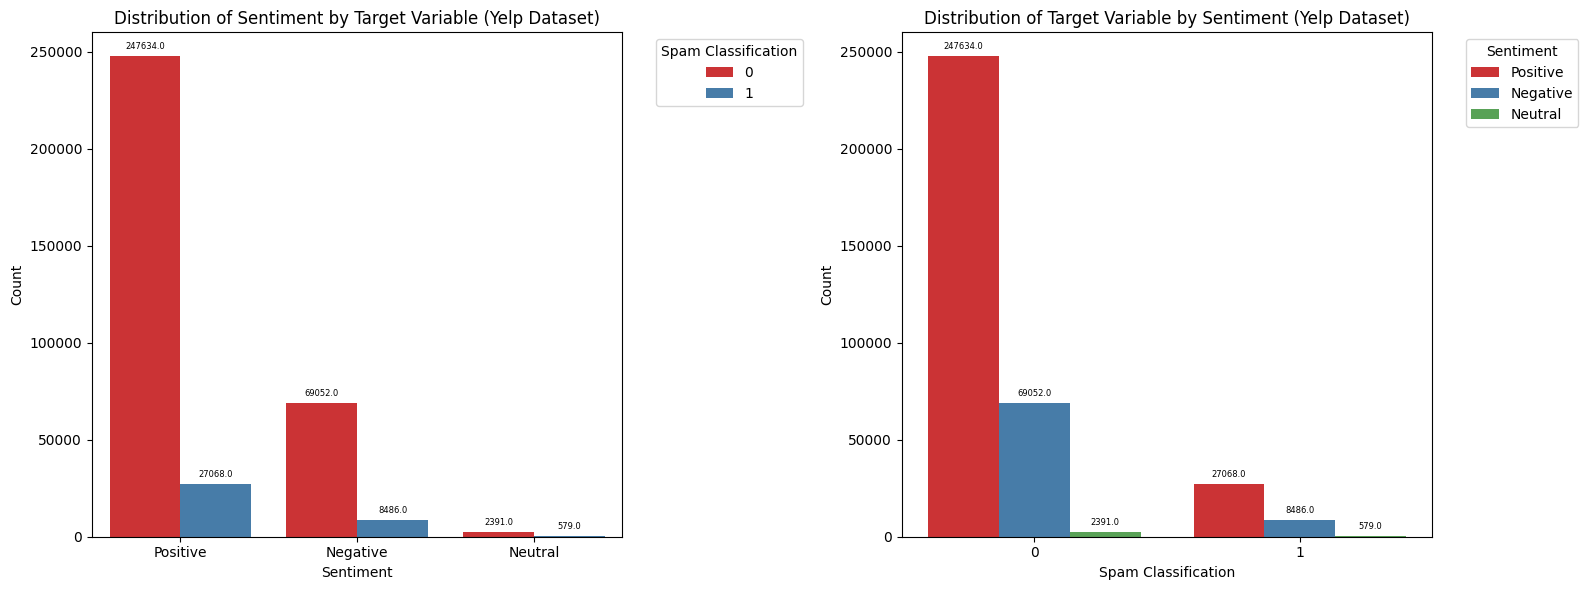

In [33]:
# Set up the figure and subplots for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First Plot: Distribution of Sentiment by Target Variable
sns.countplot(x='Sentiment', hue='Spam(1) and Not Spam(0)', data=yelp_df, palette='Set1', ax=axes[0])

# Add title and labels for the first plot
axes[0].set_title("Distribution of Sentiment by Target Variable (Yelp Dataset)")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")

# Add annotations for the first plot, only if height > 0
for p in axes[0].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[0].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=6, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[0].tick_params(axis='x', rotation=0)

# Create a legend outside the first plot
axes[0].legend(title='Spam Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

# Second Plot: Distribution of Target Variable by Sentiment
sns.countplot(x='Spam(1) and Not Spam(0)', hue='Sentiment', data=yelp_df, palette='Set1', ax=axes[1])

# Add title and labels for the second plot
axes[1].set_title("Distribution of Target Variable by Sentiment (Yelp Dataset)")
axes[1].set_xlabel("Spam Classification")
axes[1].set_ylabel("Count")

# Add annotations for the second plot, only if height > 0
for p in axes[1].patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        axes[1].annotate(f'{height}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', fontsize=6, 
                         color='black', xytext=(0, 5), 
                         textcoords='offset points')

# Rotate x-axis labels for better readability if needed
axes[1].tick_params(axis='x', rotation=0)

# Create a legend outside the second plot
axes[1].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for both plots
plt.tight_layout()
plt.show()


## Graphs between review and target variable

Distribution of target variable by average length of review

In [34]:
# Calculate the length of each review in the fake_reviews_df dataset
fake_reviews_df['review_length'] = fake_reviews_df['text_'].apply(len)

# Calculate the average length of the review grouped by the label
average_review_length_fake = fake_reviews_df.groupby('label')['review_length'].mean().reset_index()

# Ensure 'text_' and 'Review' columns contain strings
yelp_df['Review_new'] = yelp_df['Review'].astype(str)
# Calculate the length of each review in the yelp_df dataset
yelp_df['review_length'] = yelp_df['Review_new'].apply(len)

# Calculate the average length of the review grouped by the Spam(1) column
average_review_length_yelp = yelp_df.groupby('Spam(1) and Not Spam(0)')['review_length'].mean().reset_index()

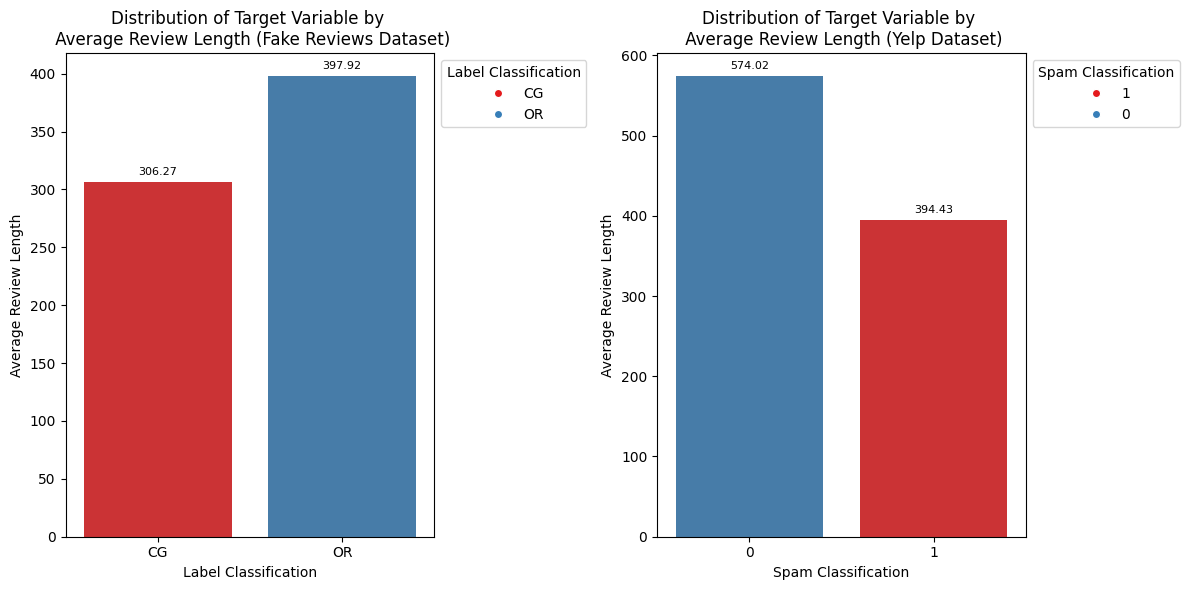

In [35]:
# Plotting average review length by label for both datasets
plt.figure(figsize=(12, 6))

# Fake Reviews dataset
ax_fake_reviews = plt.subplot(1, 2, 1)
sns.barplot(x='label', y='review_length', data=average_review_length_fake, palette=label_color_map_fake_reviews, hue='label', dodge=False, ax=ax_fake_reviews)
plt.title('Distribution of Target Variable by \n Average Review Length (Fake Reviews Dataset)')
plt.xlabel('Label Classification')
plt.ylabel('Average Review Length')

# Add numbers on top of the bars for Fake Reviews dataset
for p in ax_fake_reviews.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        ax_fake_reviews.annotate(f'{format(height, ".2f")}',
                                 (p.get_x() + p.get_width() / 2., height),
                                 ha='center', va='baseline',
                                 fontsize=8, color='black', xytext=(0, 5),
                                 textcoords='offset points')

# Manually create legend for Fake Reviews dataset
unique_labels_fake_reviews = fake_reviews_df['label'].unique()
handles_fake_reviews = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=label_color_map_fake_reviews[label]) for label in unique_labels_fake_reviews]
plt.legend(handles=handles_fake_reviews, title='Label Classification', loc='upper left', bbox_to_anchor=(1, 1))

# Yelp dataset
ax_yelp_reviews = plt.subplot(1, 2, 2)
sns.barplot(x='Spam(1) and Not Spam(0)', y='review_length', data=average_review_length_yelp, palette=label_color_map_yelp, hue='Spam(1) and Not Spam(0)', dodge=False, ax=ax_yelp_reviews)
plt.title('Distribution of Target Variable by \n Average Review Length (Yelp Dataset)')
plt.xlabel('Spam Classification')
plt.ylabel('Average Review Length')

# Add numbers on top of the bars for Yelp dataset
for p in ax_yelp_reviews.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than zero
        ax_yelp_reviews.annotate(f'{format(height, ".2f")}',
                                 (p.get_x() + p.get_width() / 2., height),
                                 ha='center', va='baseline',
                                 fontsize=8, color='black', xytext=(0, 5),
                                 textcoords='offset points')

# Manually create legend for Yelp dataset
unique_labels_yelp_reviews = yelp_df['Spam(1) and Not Spam(0)'].unique()
handles_yelp_reviews = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=label_color_map_yelp[label]) for label in unique_labels_yelp_reviews]
plt.legend(handles=handles_yelp_reviews, title='Spam Classification', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# Detection of Fraud Reviews: Pre-Processing